In [1]:
from IPython.display import display, HTML, Image, IFrame
from pathlib import Path
import requests
import json
import os

pp = lambda x: print(json.dumps(x, indent=2))

SKEMA_ADDRESS = os.environ.get("SKEMA_ADDRESS", "http://skema-py:8000")

In [2]:
IFrame(f"http://${SKEMA_ADDRESS}/docs/", width=700, height=350)

# Processing equations

## LaTeX equations $\rightarrow$ pMML

In [3]:
tex_equation = "E = mc^{2}"
r = requests.post(f"{SKEMA_ADDRESS}/eqn2mml/latex/mml", json={"tex_src": tex_equation})
print(r.text)

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block" alttext="E = mc^{2}">
  <mi>E</mi>
  <mo>=</mo>
  <mi>m</mi>
  <msup>
    <mi>c</mi>
    <mrow class="MJX-TeXAtom-ORD">
      <mn>2</mn>
    </mrow>
  </msup>
</math>


## Equation images (png) $\rightarrow$ pMML

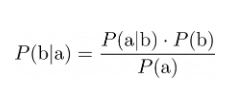

In [4]:
display(Image(filename="/data/skema/images/bayes-rule-white-bg.png"))

In [5]:
files = {
  "data": open("/data/skema/images/bayes-rule-white-bg.png", "rb"),
}
r = requests.post(f"{SKEMA_ADDRESS}/eqn2mml/image/mml", files=files)
print(r.text)

<math> <mrow> <mn> <mtr> <mtd> <msub> <mi> P </mi> <mrow> <mo> ( </mo> <mrow> <mi> b </mi> </mrow> <mrow> <mo> | </mo> </mrow> <mi> a </mi> <mo> ) </mo> </mrow> </msub> <mo> = </mo> <mrow> <mfrac> <mrow> <msub> <mi> P </mi> <mrow> <mo> ( </mo> <mrow> <mi> a </mi> </mrow> <mrow> <mo> | </mo> </mrow> <mrow> <mi> b </mi> </mrow> <mo> ) </mo> </mrow> </msub> <mo> &#x22C5 </mo> <msub> <mi> P </mi> <mrow> <mo> ( </mo> <mrow> <mi> b </mi> </mrow> <mo> ) </mo> </mrow> </msub> </mrow> <mrow> <msubsup> <mi> P </mi> <mrow> <mo> ( </mo> <mrow> <mi> a </mi> </mrow> <mo> ) </mo> </mrow> <mrow> <mo> ( </mo> <mrow> <mi> b </mi> </mrow> <mo> ) </mo> </mrow> </msubsup> </mrow> </mfrac> </mrow> </math>


# Code $\rightarrow$ function network

The Code2FN service take code as input (in multiple different forms), runs the program analysis pipeline to parse the files into CAST and translate the CAST into a Function Network (FN) and returns Gromet Function Network Module Collection (`GrometFNModuleCollection`) JSON.

The service currently accepts Python and Fortran (family) source code. The language type is determined by the filename extensions:
- Python: `.py`
- Fortran: `.f`, `.for`, `.f95`

The service can accept the following four types of code forms:
- string containing code
- single file
- multi-file - array of text-blobs and corresponding filenames
- zip archive containing a directory tree of source code files

## 1+ files (Python) $\rightarrow$ function network

In [6]:
filename = "exp1.py"
with open(Path("/data") / "skema" / "code" / filename, "r") as infile:
    contents = infile.read()

# display file contents
display(HTML(f"<code>{contents}</code>"))

# API call and response
system = {
  "files": [filename],
  "blobs": [contents],
}
response = requests.post(f"{SKEMA_ADDRESS}/code2fn/fn-given-filepaths", json=system)
pp(response.json())

{
  "schema": "FN",
  "schema_version": "0.1.7",
  "name": "",
  "modules": [
    {
      "schema": "FN",
      "schema_version": "0.1.7",
      "name": "exp1",
      "fn": {
        "name": null,
        "b": [
          {
            "function_type": "MODULE",
            "body": null,
            "import_type": null,
            "import_version": null,
            "import_source": null,
            "source_language": null,
            "source_language_version": null,
            "value": null,
            "gromet_type": "GrometBoxFunction",
            "name": "module",
            "metadata": 3
          }
        ],
        "opi": null,
        "opo": null,
        "wopio": null,
        "bf": [
          {
            "function_type": "FUNCTION",
            "body": 1,
            "import_type": null,
            "import_version": null,
            "import_source": null,
            "source_language": null,
            "source_language_version": null,
            "value": null,
 

## 1+ files (Fortran) $\rightarrow$ function network

In [7]:
filename = "exp1.f95"
with open(Path("/data") / "skema" / "code" / filename, "r") as infile:
    contents = infile.read()

# display file contents
display(HTML(f"<code>{contents}</code>"))

# API call and response
system = {
  "files": [filename],
  "blobs": [contents],
}
response = requests.post(f"{SKEMA_ADDRESS}/code2fn/fn-given-filepaths", json=system)
pp(response.json())

{
  "schema": "FN",
  "schema_version": "0.1.7",
  "name": "",
  "modules": [
    {
      "schema": "FN",
      "schema_version": "0.1.7",
      "name": "exp1.f95",
      "fn": {
        "name": null,
        "b": [
          {
            "function_type": "MODULE",
            "body": null,
            "import_type": null,
            "import_version": null,
            "import_source": null,
            "source_language": null,
            "source_language_version": null,
            "value": null,
            "gromet_type": "GrometBoxFunction",
            "name": "module",
            "metadata": 3
          }
        ],
        "opi": null,
        "opo": null,
        "wopio": null,
        "bf": [
          {
            "function_type": "EXPRESSION",
            "body": 1,
            "import_type": null,
            "import_version": null,
            "import_source": null,
            "source_language": null,
            "source_language_version": null,
            "value": n

## 1+ files (mixed languages) $\rightarrow$ function network

In [8]:
filenames = ["exp1.py", "exp1.f95"]
blobs = [open(Path("/data") / "skema" / "code" / filename, "r").read() for filename in filenames]

for blob in blobs:
    display(HTML(f"<code>{blob}</code>"))

# API call and response
system = {
  "files": filenames,
  "blobs": blobs,
}
response = requests.post(f"{SKEMA_ADDRESS}/code2fn/fn-given-filepaths", json=system)
pp(response.json())

{
  "schema": "FN",
  "schema_version": "0.1.7",
  "name": "",
  "modules": [
    {
      "schema": "FN",
      "schema_version": "0.1.7",
      "name": "exp1",
      "fn": {
        "name": null,
        "b": [
          {
            "function_type": "MODULE",
            "body": null,
            "import_type": null,
            "import_version": null,
            "import_source": null,
            "source_language": null,
            "source_language_version": null,
            "value": null,
            "gromet_type": "GrometBoxFunction",
            "name": "module",
            "metadata": 3
          }
        ],
        "opi": null,
        "opo": null,
        "wopio": null,
        "bf": [
          {
            "function_type": "FUNCTION",
            "body": 1,
            "import_type": null,
            "import_version": null,
            "import_source": null,
            "source_language": null,
            "source_language_version": null,
            "value": null,
 

## 1+ files (zip archive) $\rightarrow$ function network

In [9]:
# Format input/output paths
input_name = "system_test"
output_name = "system_test.zip"
input_path = Path("/data") / "skema" / "code" / input_name
output_path = Path("/data") / "skema" / "code" / output_name

# Convert source directory to zip archive
import shutil
shutil.make_archive(input_path, "zip", input_path)

# Read source for display
import zipfile
zip = zipfile.ZipFile(output_path)
for file in zip.namelist():
    source = zip.open(file).read().decode("UTF-8")
    display(HTML(f"<code>{source}</code>"))

# API call and response
files = {
    "zip_file": open(output_path, "rb")
}
response = requests.post(f"{SKEMA_ADDRESS}/code2fn/fn-given-filepaths-zip", files=files)
pp(response.json())

{
  "schema": "FN",
  "schema_version": "0.1.7",
  "name": "system_test.zip",
  "modules": [
    {
      "schema": "FN",
      "schema_version": "0.1.7",
      "name": "driver",
      "fn": {
        "name": null,
        "b": [
          {
            "function_type": "MODULE",
            "body": null,
            "import_type": null,
            "import_version": null,
            "import_source": null,
            "source_language": null,
            "source_language_version": null,
            "value": null,
            "gromet_type": "GrometBoxFunction",
            "name": "module",
            "metadata": 3
          }
        ],
        "opi": null,
        "opo": null,
        "wopio": null,
        "bf": [
          {
            "function_type": "EXPRESSION",
            "body": null,
            "import_type": null,
            "import_version": null,
            "import_source": null,
            "source_language": null,
            "source_language_version": null,
      

# Comment extraction

## 1 file (Python) $\rightarrow$ comments

In [10]:
filename = "CHIME_SIR.py"
with open(Path("/data") / "skema" / "code" / filename, "r") as infile:
    code = infile.read()

# display file contents
display(HTML(f"<code>{code}</code>"))

# API call and response

response = requests.post(f"{SKEMA_ADDRESS}/code2fn/extract-comments", json={"language" : "Python", "code" : code})
pp(response.json())

{
  "docstrings": {
    "sir": [
      "",
      "    The SIR model, one time step",
      "    :param s: Current amount of individuals that are susceptible",
      "    :param i: Current amount of individuals that are infectious",
      "    :param r: Current amount of individuals that are recovered",
      "    :param beta: The rate of exposure of individuals to persons infected with COVID-19",
      "    :param gamma: Rate of recovery for infected individuals",
      "    :param n: Total population size",
      "    :return:",
      "    "
    ],
    "main": [
      "",
      "    implements generic CHIME configuration without hospitalization calculation",
      "    initializes parameters and population, calculates policy, and runs dynamics",
      "    :return:",
      "    "
    ],
    "get_beta": [
      "",
      "    Calculates a rate of exposure given an intrinsic growth rate for COVID-19",
      "    :param intrinsic_growth_rate: Rate of spread of COVID-19 cases",
      "   